# Exploratory Data Analysis

#### Murilo Menezes Mendonça

In [110]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [143]:
df = pd.read_csv('../data/database_fires.csv', index_col='id')
df['data'] = pd.to_datetime(df['data'], format = '%d/%m/%Y')
df['mes'] = df['data'].apply(lambda x: x.month)

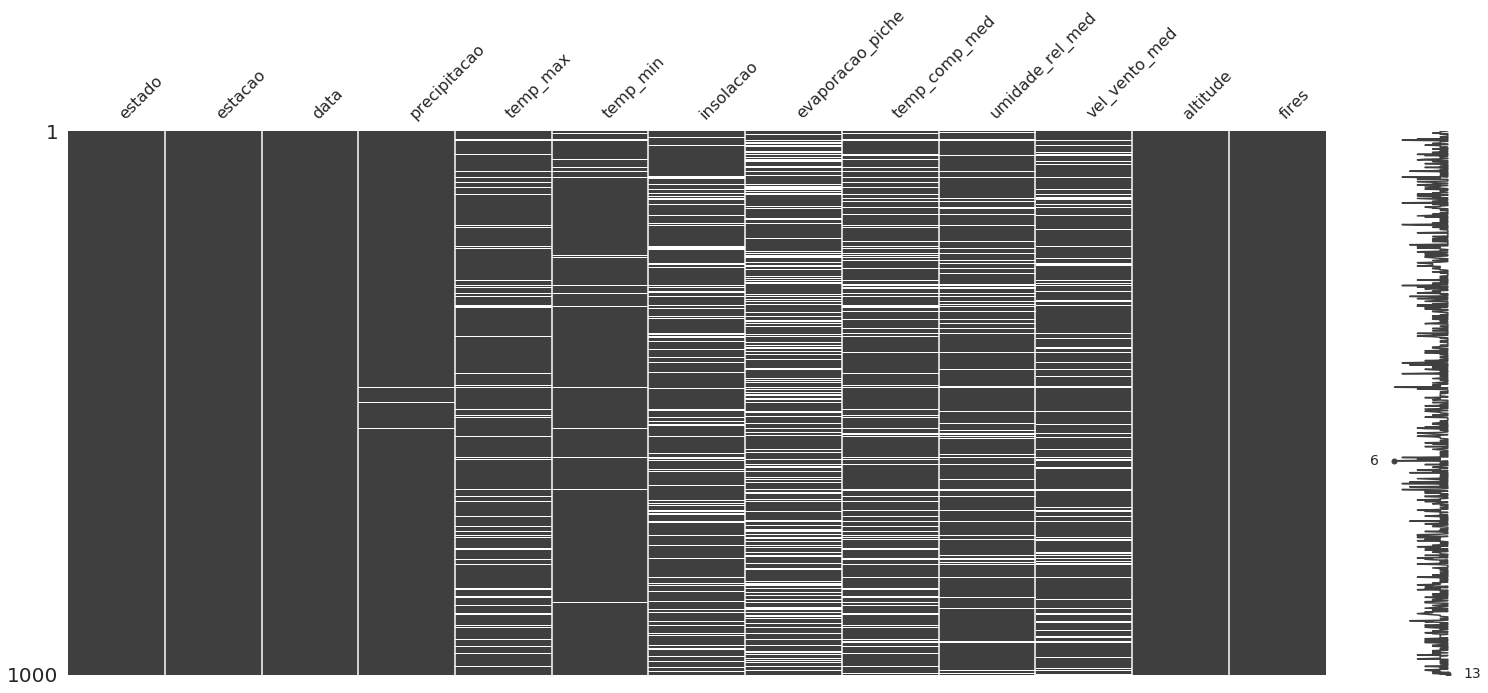

In [94]:
msno.matrix(df.sample(1000))

In [125]:
df.head()

,estado,estacao,data,precipitacao,temp_max,temp_min,insolacao,evaporacao_piche,temp_comp_med,umidade_rel_med,vel_vento_med,altitude,fires,mes
id,,,,,,,,,,,,,,
1,AC,50484,2016-01-01,NaN,31.4,NaN,2.3,NaN,NaN,96.0,0.00000,170.0,0,1
2,AC,50484,2016-01-02,0.0,32.5,23.3,4.4,NaN,26.44,95.0,0.51444,170.0,0,1
3,AC,50484,2016-01-03,35.2,30.5,24.0,0.6,NaN,25.78,97.0,0.51444,170.0,0,1
4,AC,50484,2016-01-04,60.2,31.7,22.3,2.0,NaN,25.94,96.0,0.00000,170.0,0,1
5,AC,50484,2016-01-05,28.4,28.5,23.0,0.1,NaN,25.04,95.0,0.00000,170.0,0,1


In [120]:
lista = ['precipitacao',
'temp_max',
'temp_min',
'insolacao',
'evaporacao_piche',
'temp_comp_med',
'umidade_rel_med',
'vel_vento_med']

In [146]:
for estacao in df['estacao'].unique():
    for column in lista:
        df[column].fillna((df[df['estacao']==estacao][column]).median())

In [148]:
df.isna().sum()

estado                  0
estacao                 0
data                    0
precipitacao         1407
temp_max            26894
temp_min            11588
insolacao           40549
evaporacao_piche    73571
temp_comp_med       41838
umidade_rel_med     32823
vel_vento_med       43310
altitude                0
fires                   0
mes                     0
dtype: int64

In [115]:
df_sem_dummy = pd.get_dummies(df.drop(['estacao'], axis=1), drop_first=True)

In [116]:
X = df_sem_dummy.drop(['fires','data'], axis=1)
y = df_sem_dummy['fires']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

f1_score(y_pred,y_test)

0.5030243783222337

In [117]:
X = df_sem_dummy.drop(['fires','data'], axis=1)
y = df_sem_dummy['fires']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = RandomForestClassifier(max_depth=5, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

f1_score(y_pred,y_test)

/home/murilomen/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.3018212045643467

## To-do

[x] Incluir data com meses do ano

[ ] Balancear variavel resposta

[ ] Tentar incluir estacao

[ ] Tratar NaNs de uma forma melhor

[ ] Diminuir granularidade de estados para regioes

[ ] Diminuir granularidade de meses para estações